In [10]:
import pandas as pd
import os

data_path = "/content/sample_data"

file_name = "personal_finance_dataset.xlsx"

file_path = os.path.join(data_path, file_name)

df = pd.read_excel(file_path)

df.head(10)

,Variable Name,Readable Name,Description,Type,Values/Ranges,Notes
0,PAGEMIEG,Age Group,Age of major income earner (grouped),Categorical,"1=Under 25, 2=25-34, 3=35-44, 4=45-54, 5=55-64...",Focus on groups 1-4 for this challenge
1,PATTCRU,Credit Card Payment,Credit card payment behavior (usual),Categorical,"1=<Minimum, 2=Minimum, 3=More than min but <fu...",4 means Good financial health
2,PATTSITC,COVID Financial Impact,Change in financial situation since COVID-19,Categorical,"1=Improved, 2=Worsened, 3=Stayed same",NaN
3,PATTSKP,Skipped Payments,Skipped/delayed non-mortgage payment in last 1...,Binary,"1=Yes, 2=No",NaN
4,PEDUCMIE,Education Level,Highest education of major income earner,Categorical,"1=<High school, 2=High school, 3=Post-secondar...",NaN
5,PEFATINC,After-Tax Income,Annual after-tax income,Continuous,-$2.7M to $2.0M,NaN
6,PFMTYPG,Family Type,Composition of family unit,Categorical,"1=Single, 2=Couple no kids, 3=Couple/lone pare...",NaN
7,PFTENUR,Home Ownership,Principal residence ownership status,Categorical,"1=Own outright, 2=Own with mortgage, 3=Do not ...",Major financial stability indicator
8,PLFFPTME,Work Status 2022,Whether worked full-time or part-time in 2022,Categorical,"1=Mostly full-time, 2=Mostly part-time, 3=Did ...",NaN
9,PNBEARG,Number of Earners,Number of earners aged 15+ in family,Categorical,"0=None, 1=One, 2=Two, 3=Three or more, 9=Not s...",NaN


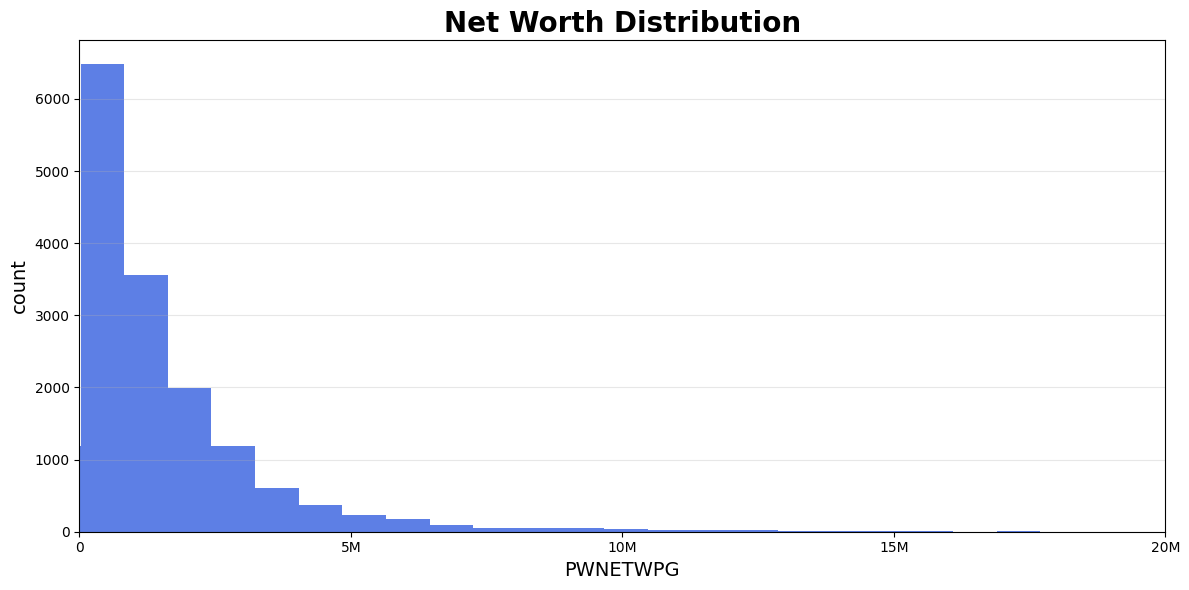

In [12]:
import matplotlib.pyplot as plt
import numpy as np

file_path = "/content/sample_data/personal_finance_dataset.xlsx"
df = pd.read_excel(file_path, sheet_name="datathon_finance")

df["PWNETWPG"] = pd.to_numeric(df["PWNETWPG"], errors="coerce")
data = df["PWNETWPG"].dropna()

plt.figure(figsize=(12, 6))

plt.hist(
    data,
    bins=50,
    color="royalblue",
    alpha=0.85
)

plt.title("Net Worth Distribution", fontsize=20, fontweight="bold")
plt.xlabel("PWNETWPG", fontsize=14)
plt.ylabel("count", fontsize=14)

ticks = np.arange(0, 20_000_001, 5_000_000)
labels = ["0", "5M", "10M", "15M", "20M"]
plt.xticks(ticks, labels)

plt.xlim(0, 20_000_000)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

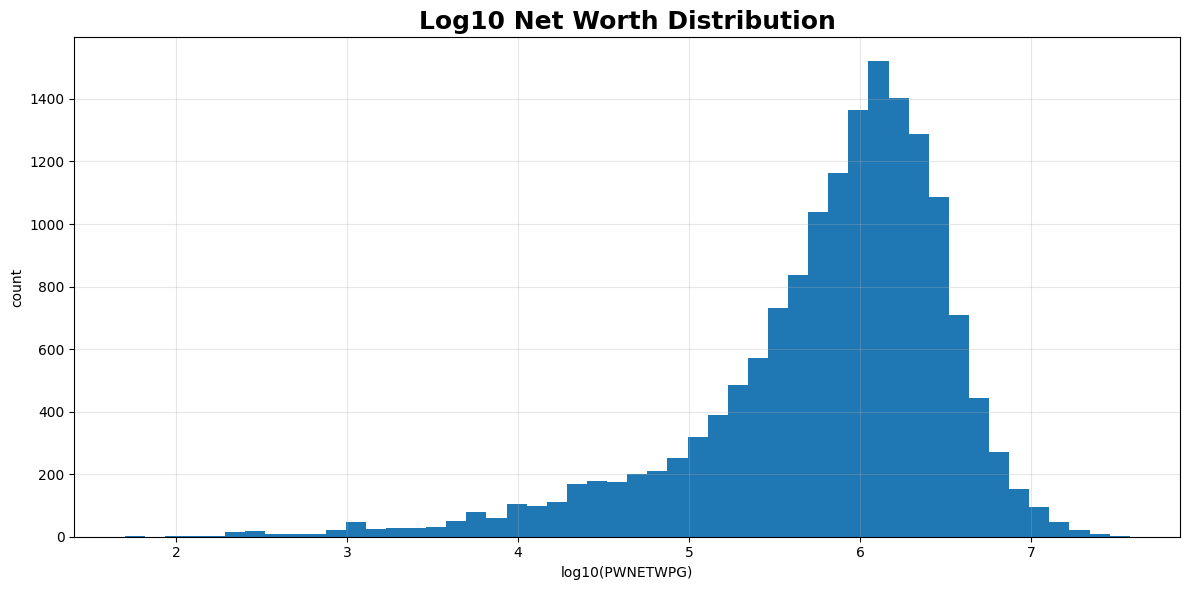

In [13]:

data = data[data > 0]

log_data = np.log10(data)

plt.figure(figsize=(12,6))

plt.hist(log_data, bins=50)

plt.title("Log10 Net Worth Distribution", fontsize=18, fontweight="bold")
plt.xlabel("log10(PWNETWPG)")
plt.ylabel("count")

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

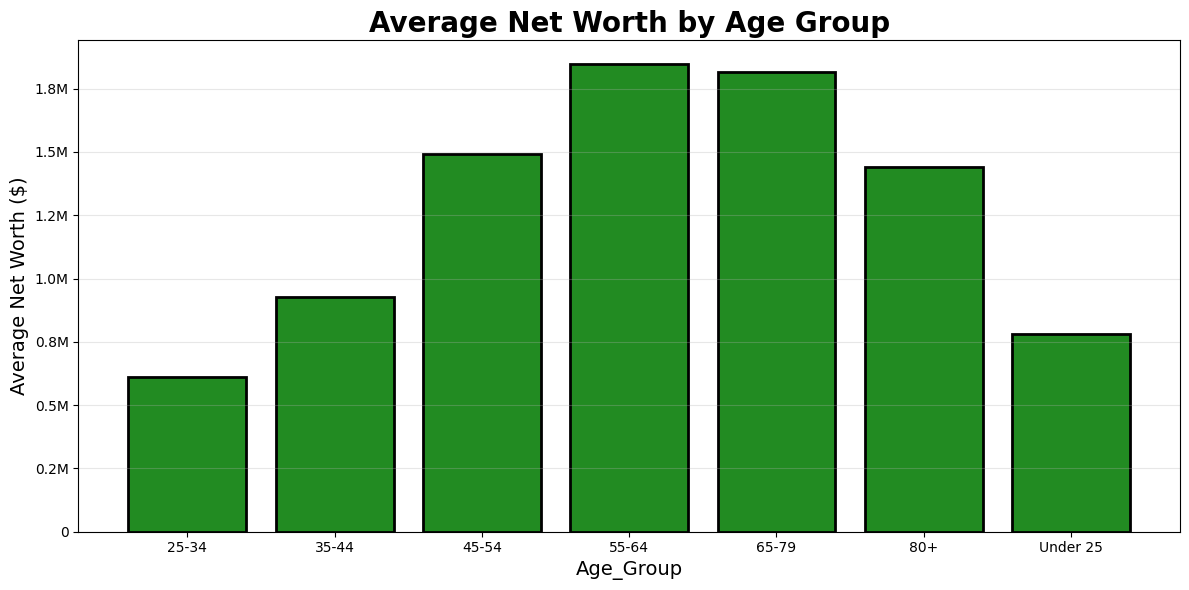

In [15]:
df["PWNETWPG"] = pd.to_numeric(df["PWNETWPG"], errors="coerce")

df = df[df["PAGEMIEG"].isin([1,2,3,4,5,6,7])]

age_map = {
    1: "Under 25",
    2: "25-34",
    3: "35-44",
    4: "45-54",
    5: "55-64",
    6: "65-79",
    7: "80+"
}

df["Age_Group"] = df["PAGEMIEG"].map(age_map)

avg_networth = (
    df.groupby("Age_Group")["PWNETWPG"]
    .mean()
    .reindex(["25-34","35-44","45-54","55-64","65-79","80+","Under 25"])
)

# --- Plot ---
plt.figure(figsize=(12,6))

bars = plt.bar(
    avg_networth.index,
    avg_networth.values,
    color="forestgreen",
    edgecolor="black",
    linewidth=2
)

plt.title("Average Net Worth by Age Group", fontsize=20, fontweight="bold")
plt.xlabel("Age_Group", fontsize=14)
plt.ylabel("Average Net Worth ($)", fontsize=14)

plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M' if x != 0 else '0')
)

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

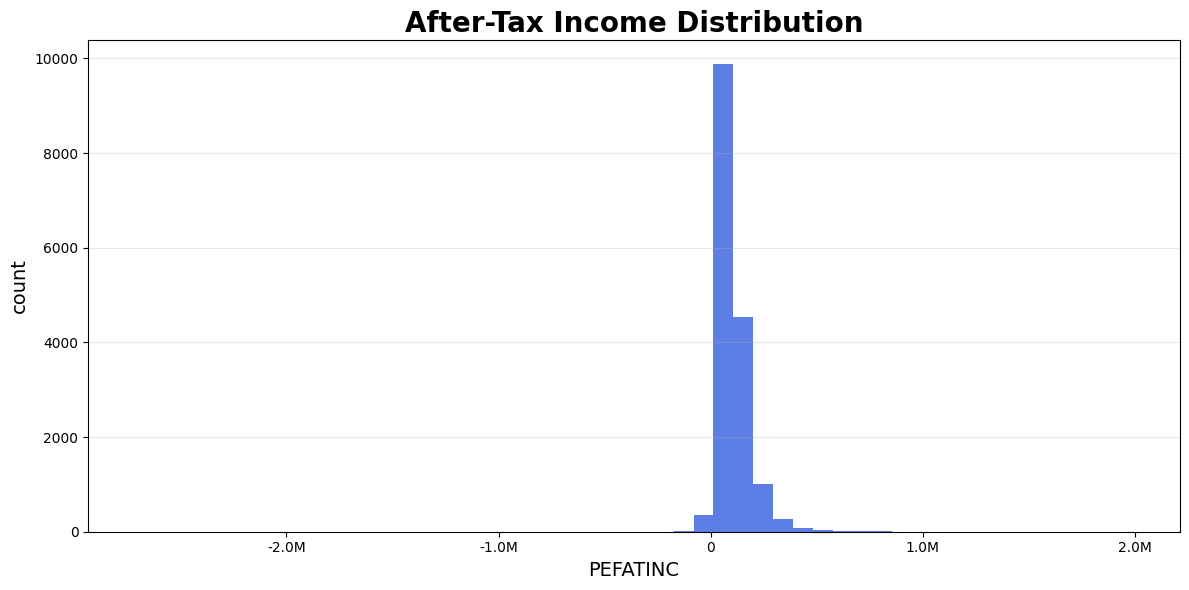

In [16]:
df["PEFATINC"] = pd.to_numeric(df["PEFATINC"], errors="coerce")
data = df["PEFATINC"].dropna()

plt.figure(figsize=(12,6))

plt.hist(
    data,
    bins=50,
    color="royalblue",
    alpha=0.85
)

plt.title("After-Tax Income Distribution", fontsize=20, fontweight="bold")
plt.xlabel("PEFATINC", fontsize=14)
plt.ylabel("count", fontsize=14)

plt.gca().xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M' if x != 0 else '0')
)

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

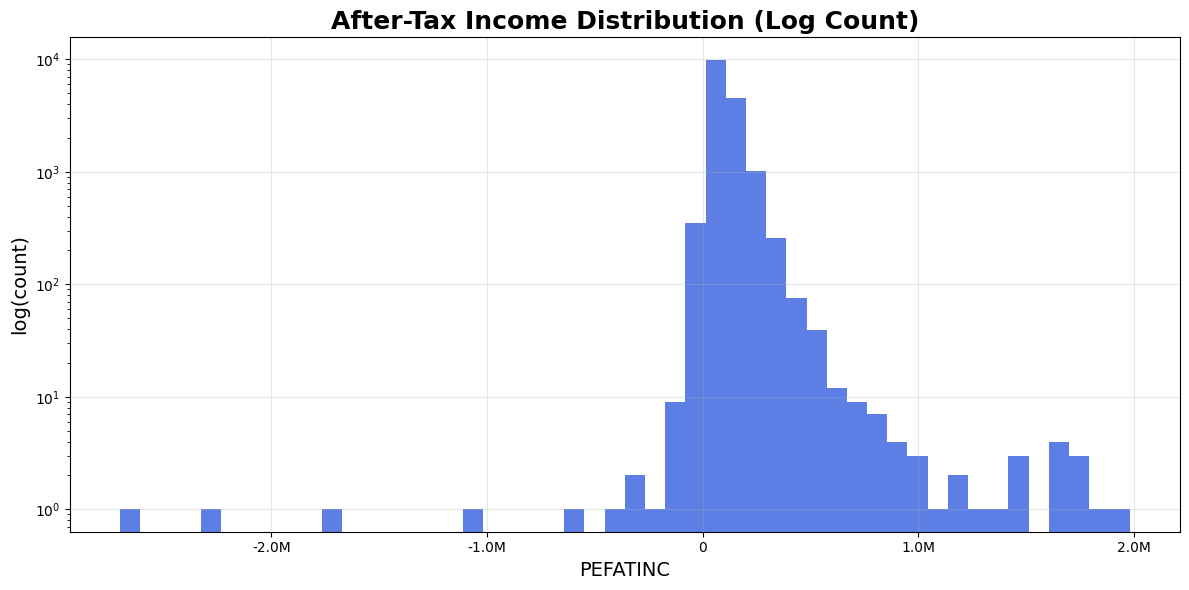

In [20]:
df["PEFATINC"] = pd.to_numeric(df["PEFATINC"], errors="coerce")
data = df["PEFATINC"].dropna()

plt.figure(figsize=(12,6))

plt.hist(
    data,
    bins=50,
    color="royalblue",
    alpha=0.85,
    log=True
)

plt.title("After-Tax Income Distribution (Log Count)", fontsize=18, fontweight="bold")
plt.xlabel("PEFATINC", fontsize=14)
plt.ylabel("log(count)", fontsize=14)

plt.gca().xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M' if x != 0 else '0')
)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

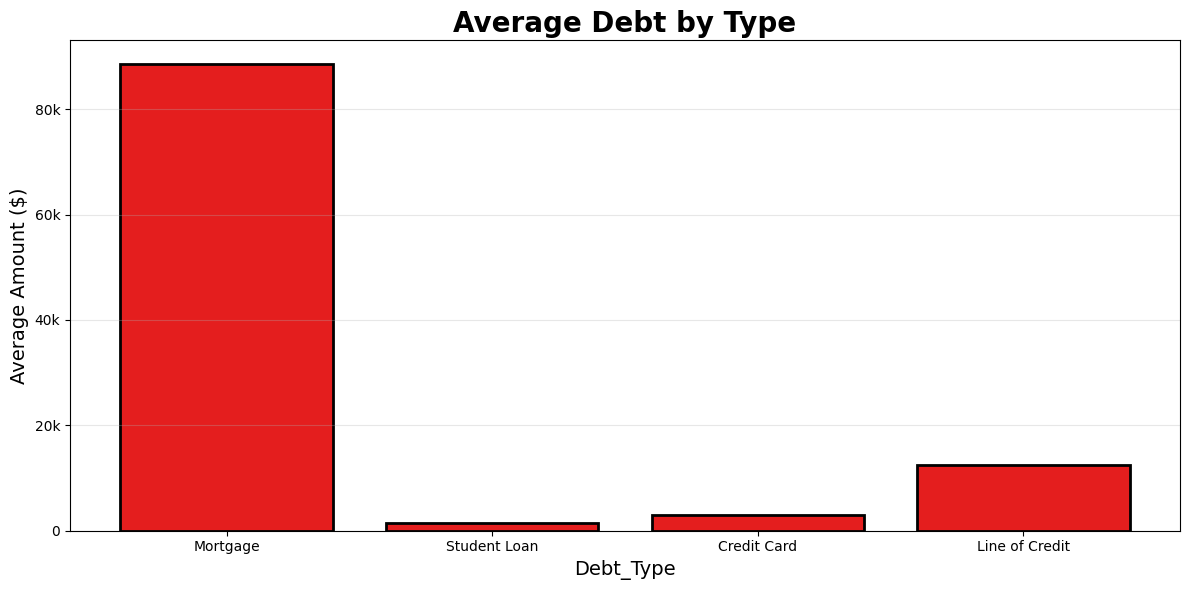

In [22]:
cols = ["PWDPRMOR", "PWDSLOAN", "PWDSTCRD", "PWDSTLOC"]
for col in cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

avg_debt = {
    "Mortgage": df["PWDPRMOR"].mean(),
    "Student Loan": df["PWDSLOAN"].mean(),
    "Credit Card": df["PWDSTCRD"].mean(),
    "Line of Credit": df["PWDSTLOC"].mean()
}

plt.figure(figsize=(12,6))

plt.bar(
    avg_debt.keys(),
    avg_debt.values(),
    color="#E41E1E",
    edgecolor="black",
    linewidth=2
)

plt.title("Average Debt by Type", fontsize=20, fontweight="bold")
plt.xlabel("Debt_Type", fontsize=14)
plt.ylabel("Average Amount ($)", fontsize=14)

plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{int(x/1000)}k' if x >= 1000 else f'{int(x)}')
)

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

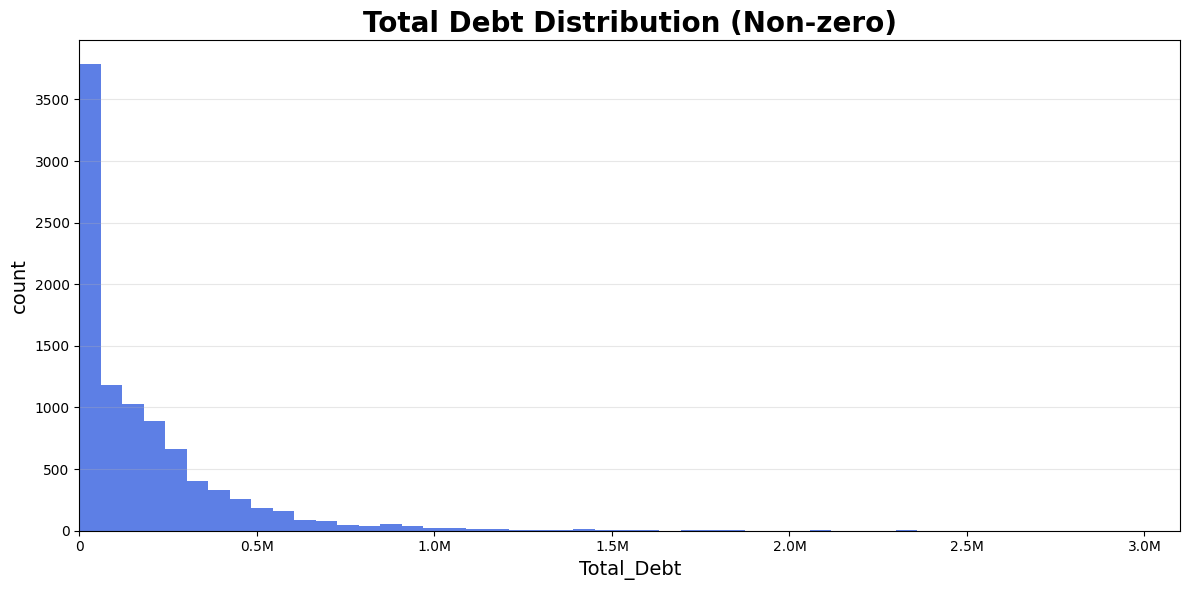

In [23]:
debt_cols = ["PWDPRMOR", "PWDSLOAN", "PWDSTCRD", "PWDSTLOC"]

for col in debt_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df["Total_Debt"] = df[debt_cols].sum(axis=1)

total_debt_nonzero = df[df["Total_Debt"] > 0]["Total_Debt"]

plt.figure(figsize=(12,6))

plt.hist(
    total_debt_nonzero,
    bins=50,
    color="royalblue",
    alpha=0.85
)

plt.title("Total Debt Distribution (Non-zero)", fontsize=20, fontweight="bold")
plt.xlabel("Total_Debt", fontsize=14)
plt.ylabel("count", fontsize=14)

plt.gca().xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M' if x != 0 else '0')
)

plt.xlim(0, 3_100_000)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

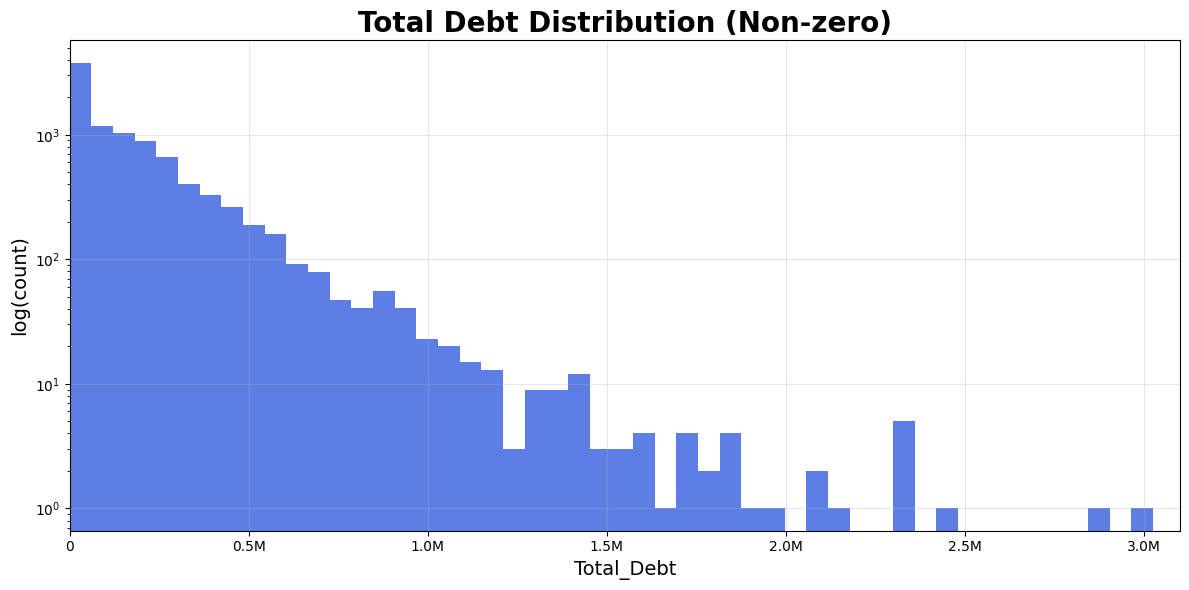

In [24]:
debt_cols = ["PWDPRMOR", "PWDSLOAN", "PWDSTCRD", "PWDSTLOC"]
for col in debt_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df["Total_Debt"] = df[debt_cols].sum(axis=1)

total_debt_nonzero = df[df["Total_Debt"] > 0]["Total_Debt"]

plt.figure(figsize=(12,6))

plt.hist(
    total_debt_nonzero,
    bins=50,
    color="royalblue",
    alpha=0.85
)

plt.yscale("log")

plt.title("Total Debt Distribution (Non-zero)", fontsize=20, fontweight="bold")
plt.xlabel("Total_Debt", fontsize=14)
plt.ylabel("log(count)", fontsize=14)

plt.gca().xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M' if x != 0 else '0')
)

plt.xlim(0, 3_100_000)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

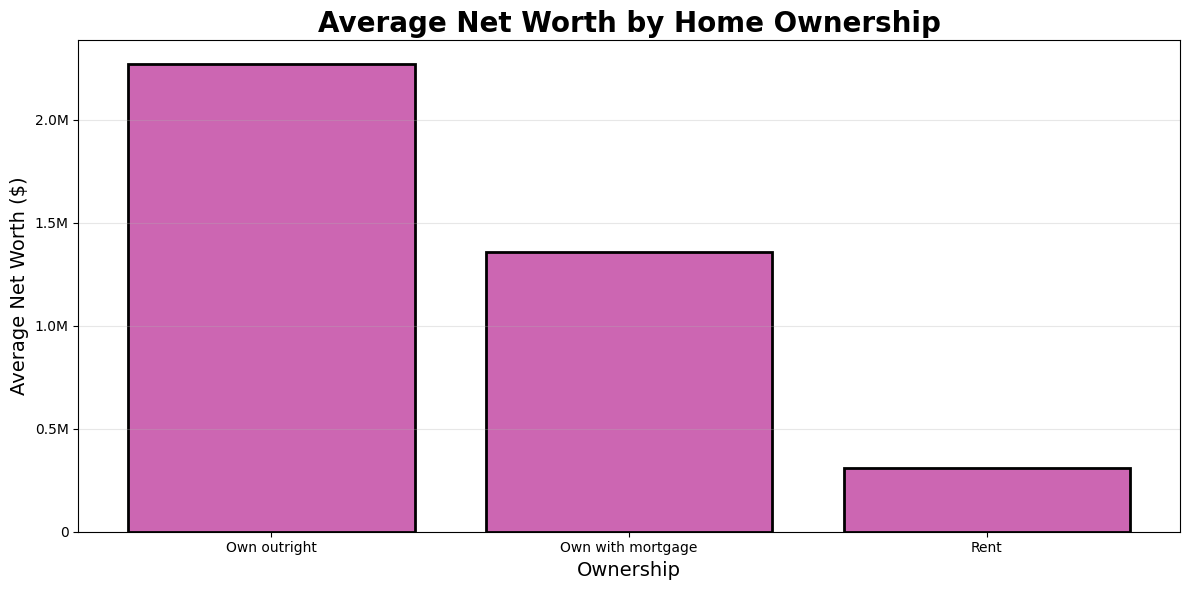

In [25]:
df["PWNETWPG"] = pd.to_numeric(df["PWNETWPG"], errors="coerce")

tenure_map = {
    1: "Own outright",
    2: "Own with mortgage",
    3: "Rent"
}

df = df[df["PFTENUR"].isin([1,2,3])]
df["Ownership"] = df["PFTENUR"].map(tenure_map)

avg_networth = (
    df.groupby("Ownership")["PWNETWPG"]
    .mean()
    .reindex(["Own outright", "Own with mortgage", "Rent"])
)

plt.figure(figsize=(12,6))

plt.bar(
    avg_networth.index,
    avg_networth.values,
    color="#CC66B2",
    edgecolor="black",
    linewidth=2
)

plt.title("Average Net Worth by Home Ownership", fontsize=20, fontweight="bold")
plt.xlabel("Ownership", fontsize=14)
plt.ylabel("Average Net Worth ($)", fontsize=14)

plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M' if x != 0 else '0')
)

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

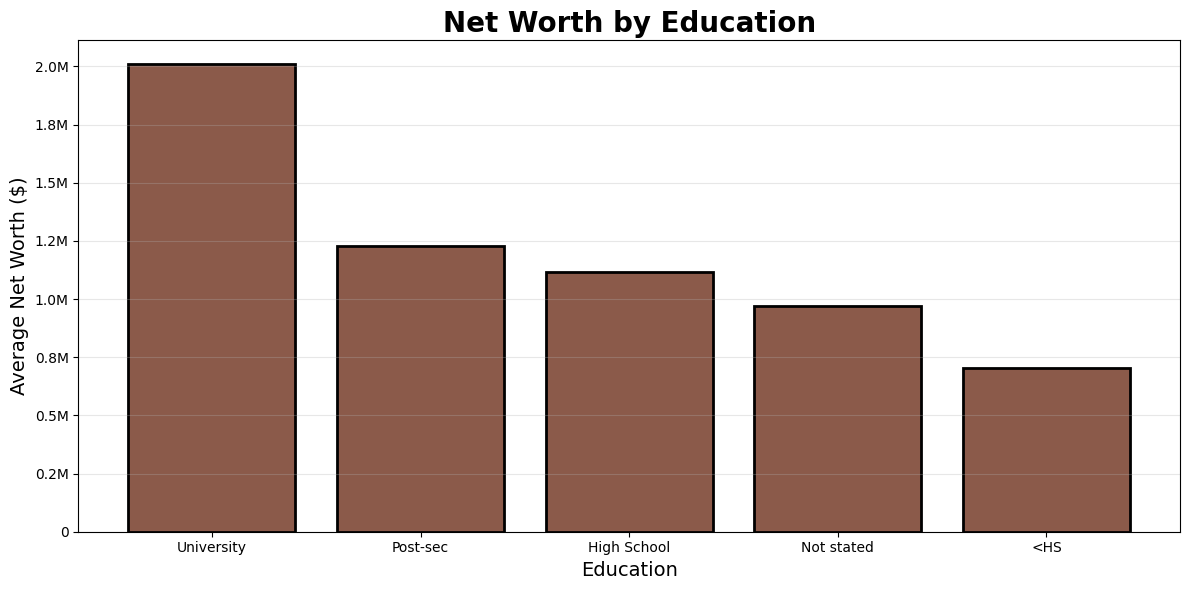

In [26]:
df["PWNETWPG"] = pd.to_numeric(df["PWNETWPG"], errors="coerce")

edu_map = {
    1: "<HS",
    2: "High School",
    3: "Post-sec",
    4: "University",
    9: "Not stated"
}

df = df[df["PEDUCMIE"].isin([1,2,3,4,9])]
df["Education"] = df["PEDUCMIE"].map(edu_map)

avg_networth = (
    df.groupby("Education")["PWNETWPG"]
    .mean()
    .reindex(["University", "Post-sec", "High School", "Not stated", "<HS"])
)

plt.figure(figsize=(12,6))

plt.bar(
    avg_networth.index,
    avg_networth.values,
    color="#8B5A4A",
    edgecolor="black",
    linewidth=2
)

plt.title("Net Worth by Education", fontsize=20, fontweight="bold")
plt.xlabel("Education", fontsize=14)
plt.ylabel("Average Net Worth ($)", fontsize=14)

plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M' if x != 0 else '0')
)

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

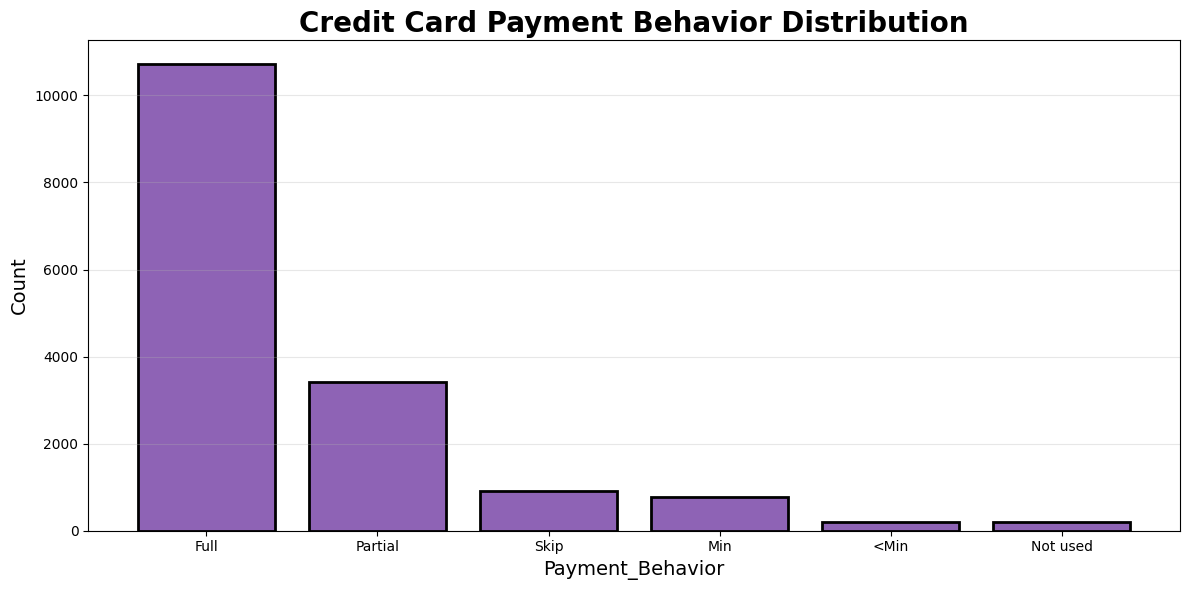

In [28]:
payment_map = {
    1: "<Min",
    2: "Min",
    3: "Partial",
    4: "Full",
    5: "Not used",
    6: "Skip"
}

df = df[df["PATTCRU"].isin(payment_map.keys())]
df["Payment_Behavior"] = df["PATTCRU"].map(payment_map)

counts = (
    df["Payment_Behavior"]
    .value_counts()
    .reindex(["Full", "Partial", "Skip", "Min", "<Min", "Not used"])
)

plt.figure(figsize=(12,6))

plt.bar(
    counts.index,
    counts.values,
    color="#8E63B5",
    edgecolor="black",
    linewidth=2
)

plt.title("Credit Card Payment Behavior Distribution", fontsize=20, fontweight="bold")
plt.xlabel("Payment_Behavior", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

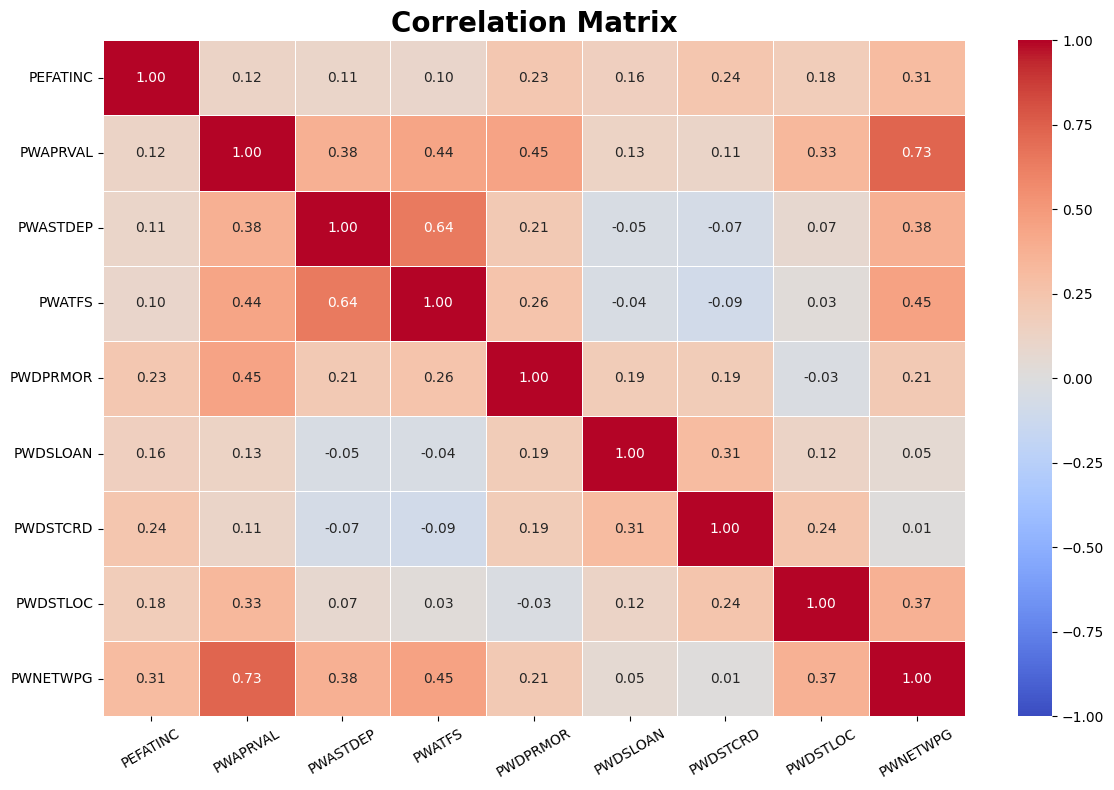

In [37]:
import seaborn as sns
cols = [
    "PEFATINC",   # After-tax income
    "PWAPRVAL",   # Property value
    "PWASTDEP",   # Deposits
    "PWATFS",     # Tax-free savings
    "PWDPRMOR",   # Mortgage debt
    "PWDSLOAN",   # Student loan
    "PWDSTCRD",   # Credit card debt
    "PWDSTLOC",   # Line of credit
    "PWNETWPG"    # Net worth
]

df_numeric = df[cols].apply(pd.to_numeric, errors="coerce")

corr = df_numeric.corr()

plt.figure(figsize=(12,8))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.5
)

plt.title("Correlation Matrix", fontsize=20, fontweight="bold")
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [38]:

cols = [
    "PWNETWPG",
    "PEFATINC",
    "PWAPRVAL",
    "PWASTDEP",
    "PWATFS",
    "PWDPRMOR",
    "PWDSLOAN",
    "PWDSTCRD",
    "PWDSTLOC"
]

df = df[cols].apply(pd.to_numeric, errors="coerce").dropna()

df = df[(df > 0).all(axis=1)]

df_log = np.log(df)

y = df_log["PWNETWPG"]
X = df_log.drop(columns=["PWNETWPG"])

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               PWNETWPG   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     15.16
Date:                Sat, 28 Feb 2026   Prob (F-statistic):           3.07e-13
Time:                        16:52:31   Log-Likelihood:                -91.236
No. Observations:                  88   AIC:                             200.5
Df Residuals:                      79   BIC:                             222.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.6197      2.289     -2.455      0.0

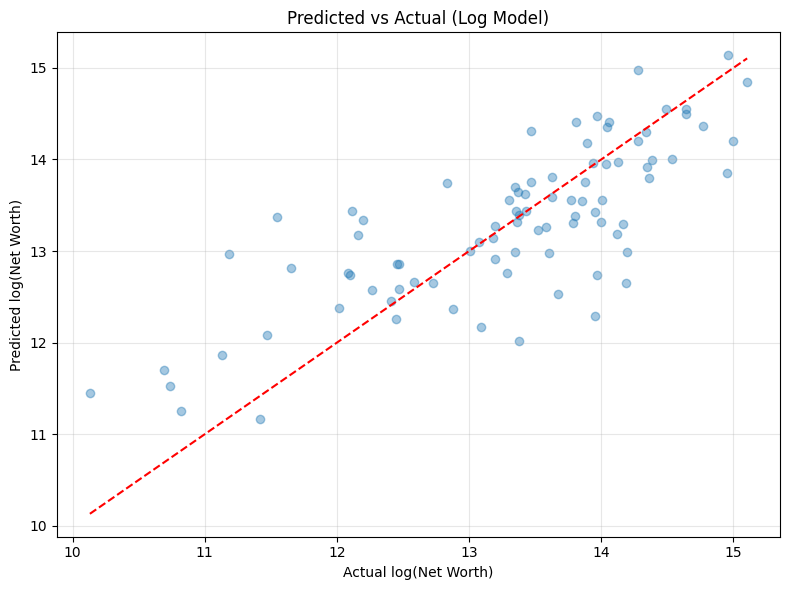

In [40]:
y_pred = model.predict(X)

plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, alpha=0.4)

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')

plt.xlabel("Actual log(Net Worth)")
plt.ylabel("Predicted log(Net Worth)")
plt.title("Predicted vs Actual (Log Model)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

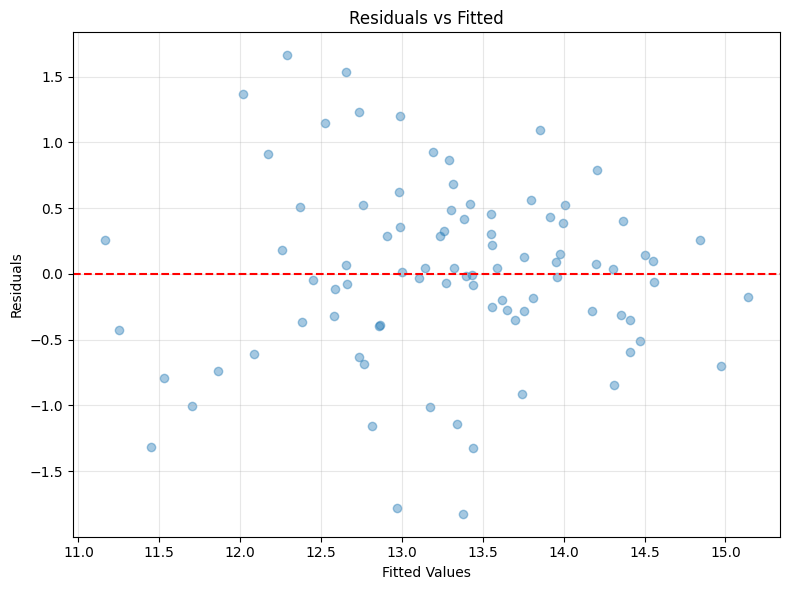

In [41]:
residuals = y - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.4)

plt.axhline(0, color='red', linestyle='--')

plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [44]:
import statsmodels.api as sm

cols = [
    "PWNETWPG",
    "PEFATINC",
    "PWAPRVAL",
    "PWASTDEP",
    "PWATFS",
    "PWDPRMOR"
]

df = df[cols].apply(pd.to_numeric, errors="coerce").dropna()

# Keep positive values for log
df = df[(df > 0).all(axis=1)]

# Log transform
df_log = np.log(df)

y = df_log["PWNETWPG"]
X = df_log.drop(columns=["PWNETWPG"])
X = sm.add_constant(X)

model2 = sm.OLS(y, X).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               PWNETWPG   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     22.34
Date:                Sat, 28 Feb 2026   Prob (F-statistic):           4.59e-14
Time:                        16:55:08   Log-Likelihood:                -94.341
No. Observations:                  88   AIC:                             200.7
Df Residuals:                      82   BIC:                             215.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7197      2.321     -2.465      0.0

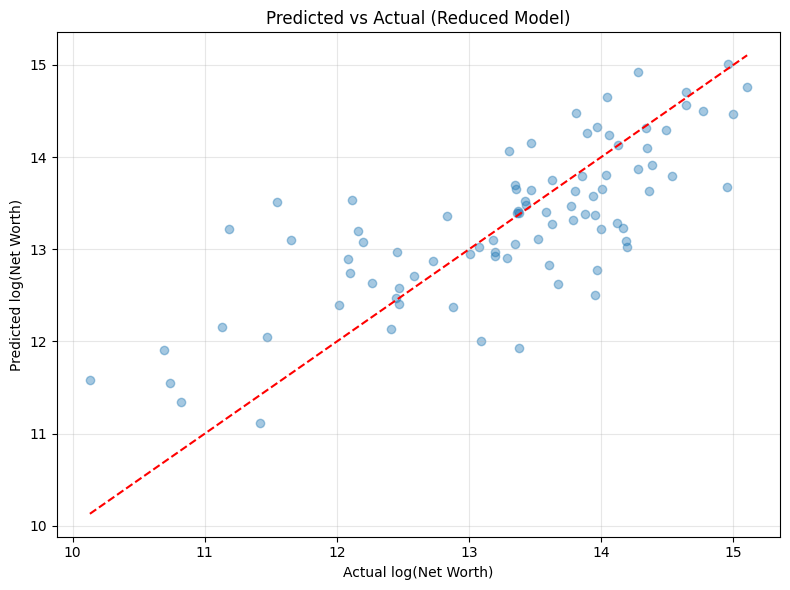

In [45]:
y_pred2 = model2.predict(X)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y, y_pred2, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')

plt.xlabel("Actual log(Net Worth)")
plt.ylabel("Predicted log(Net Worth)")
plt.title("Predicted vs Actual (Reduced Model)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

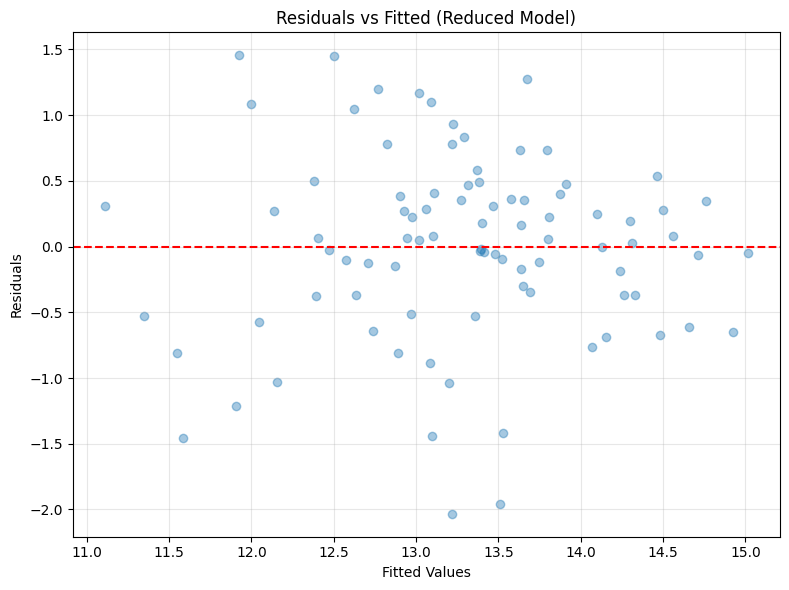

In [46]:
residuals2 = y - y_pred2

plt.figure(figsize=(8,6))
plt.scatter(y_pred2, residuals2, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')

plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Reduced Model)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [47]:
print("Full model R2:", model.rsquared)
print("Reduced model R2:", model2.rsquared)

print("Full model AIC:", model.aic)
print("Reduced model AIC:", model2.aic)

Full model R2: 0.6055147986445713
Reduced model R2: 0.576674867059024
Full model AIC: 200.47299376640973
Reduced model AIC: 200.6821762990214
